# Real Off Days in Finland: 2000–2050

## Introduction
This project investigates the number of "real off days" in Finland for each year from 2000 to 2050. "Real off days" are defined as public holidays that do not fall on weekends (Saturday or Sunday). The goal is to:
- Analyze trends in real off days over the years.
- Identify the best and worst years in terms of real off days.
- Gain insights into how Finnish public holidays align with weekends.

## Objectives
1. Calculate all public holidays in Finland for the years 2000–2050.
2. Determine how many of these holidays fall on weekends.
3. Calculate the number of real off days for each year.
4. Visualize and analyze the data to identify patterns and trends.


In [142]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import holidays
from datetime import date, timedelta

## Step 2: Holiday and Weekend Calculation

### Objectives
1. Generate public holidays for Finland from 2000 to 2050.
2. Identify weekends (Saturdays and Sundays) for each year.
3. Combine the holiday and weekend data to prepare for further analysis.

### Tools and Approach
- Use the `holidays` library to generate public holidays in Finland.
- Use Python’s `datetime` to identify all weekends in the given range.
- Organize holidays and weekends into a structured format for analysis.


In [143]:
# Define the range of years for analysis
start_year = 2000
end_year = 2050

# Initialize the holidays library for Finland
fi_holidays = {year: holidays.FI(years=year) for year in range(start_year, end_year + 1)}
display(fi_holidays[2024])

{datetime.date(2024, 1, 1): 'Uudenvuodenpäivä', datetime.date(2024, 1, 6): 'Loppiainen', datetime.date(2024, 3, 29): 'Pitkäperjantai', datetime.date(2024, 3, 31): 'Pääsiäispäivä', datetime.date(2024, 4, 1): 'Toinen pääsiäispäivä', datetime.date(2024, 5, 1): 'Vappu', datetime.date(2024, 5, 9): 'Helatorstai', datetime.date(2024, 5, 19): 'Helluntaipäivä', datetime.date(2024, 6, 21): 'Juhannusaatto', datetime.date(2024, 6, 22): 'Juhannuspäivä', datetime.date(2024, 11, 2): 'Pyhäinpäivä', datetime.date(2024, 12, 6): 'Itsenäisyyspäivä', datetime.date(2024, 12, 24): 'Jouluaatto', datetime.date(2024, 12, 25): 'Joulupäivä', datetime.date(2024, 12, 26): 'Tapaninpäivä'}

In [144]:
# Preview holidays for a sample year
sample_year = 2024
print(f"Holidays in {sample_year}:")
for holy_date, name in fi_holidays[sample_year].items():
    print(f"{holy_date}: {name}")

Holidays in 2024:
2024-01-01: Uudenvuodenpäivä
2024-01-06: Loppiainen
2024-03-29: Pitkäperjantai
2024-03-31: Pääsiäispäivä
2024-04-01: Toinen pääsiäispäivä
2024-05-01: Vappu
2024-05-09: Helatorstai
2024-05-19: Helluntaipäivä
2024-06-21: Juhannusaatto
2024-06-22: Juhannuspäivä
2024-11-02: Pyhäinpäivä
2024-12-06: Itsenäisyyspäivä
2024-12-24: Jouluaatto
2024-12-25: Joulupäivä
2024-12-26: Tapaninpäivä


In [145]:
# Function to calculate all weekends for a given year
def get_weekends(year):
    weekends = []
    start_date = date(year, 1, 1)
    end_date = date(year, 12, 31)
    current_date = start_date
    while current_date <= end_date:
        if current_date.weekday() in [5, 6]:  # 5 = Saturday, 6 = Sunday
            weekends.append(current_date)
        current_date += timedelta(days=1)
    return weekends

In [146]:
# Generate weekends for all years in the range
weekends = {year: get_weekends(year) for year in range(start_year, end_year + 1)}

# Preview weekends for a sample year
print(f"\nWeekends in {sample_year}:")
print(weekends[sample_year][:10])  # Show first 10 weekends as samples


Weekends in 2024:
[datetime.date(2024, 1, 6), datetime.date(2024, 1, 7), datetime.date(2024, 1, 13), datetime.date(2024, 1, 14), datetime.date(2024, 1, 20), datetime.date(2024, 1, 21), datetime.date(2024, 1, 27), datetime.date(2024, 1, 28), datetime.date(2024, 2, 3), datetime.date(2024, 2, 4)]


## Step 3: Real Off Days Calculation

### Objectives
1. Identify public holidays that fall on weekends (Saturday or Sunday).
2. Subtract weekend-aligned holidays from the total number of public holidays for each year.
3. Calculate the number of "real off days" for each year.

### Definitions
- **Real Off Days**: Public holidays that do not fall on weekends.

In [147]:
print(weekends[sample_year][-10:])  # Show last 10 weekends as samples
print(fi_holidays[sample_year].keys())

[datetime.date(2024, 11, 30), datetime.date(2024, 12, 1), datetime.date(2024, 12, 7), datetime.date(2024, 12, 8), datetime.date(2024, 12, 14), datetime.date(2024, 12, 15), datetime.date(2024, 12, 21), datetime.date(2024, 12, 22), datetime.date(2024, 12, 28), datetime.date(2024, 12, 29)]
dict_keys([datetime.date(2024, 1, 1), datetime.date(2024, 1, 6), datetime.date(2024, 3, 29), datetime.date(2024, 3, 31), datetime.date(2024, 4, 1), datetime.date(2024, 5, 1), datetime.date(2024, 5, 9), datetime.date(2024, 5, 19), datetime.date(2024, 6, 21), datetime.date(2024, 6, 22), datetime.date(2024, 11, 2), datetime.date(2024, 12, 6), datetime.date(2024, 12, 24), datetime.date(2024, 12, 25), datetime.date(2024, 12, 26)])


In [148]:
# Function to calculate real off days for a given year
def calculate_real_off_days(year, holidays_dict, weekends_dict):
    holidays_on_weekends = 0
    for holiday_date in holidays_dict[year].keys():
        if holiday_date in weekends_dict[year]:
            holidays_on_weekends += 1
    total_holidays = len(holidays_dict[year])
    real_off_days = total_holidays - holidays_on_weekends
    return real_off_days

In [149]:
# Generate the number of real off days for each year
real_off_days = {
    year: calculate_real_off_days(year, fi_holidays, weekends)
    for year in range(start_year, end_year + 1)
}

In [150]:
# Preview results for a few sample years
for year in range(2021, 2024 +1):
    print(f"{year}: {real_off_days[year]} real off days")

2021: 8 real off days
2022: 7 real off days
2023: 9 real off days
2024: 10 real off days


In [151]:
sample_year = 2027

print(f"number of holidays in {sample_year}:" , len(fi_holidays[sample_year]))
print(f"number of weekends in {sample_year}:" , len(weekends[sample_year])) 

print(fi_holidays[sample_year])
holidays_on_weekends = 0
for day in fi_holidays[sample_year].keys():
    if day in weekends[sample_year]:
        print("      Weekend", day)
        holidays_on_weekends += 1
    else:
        print("Weekday", day)
print("Holidays on weekends:", holidays_on_weekends)
print("Real off days:", len(fi_holidays[sample_year]) - holidays_on_weekends)

number of holidays in 2027: 15
number of weekends in 2027: 104
{datetime.date(2027, 1, 1): 'Uudenvuodenpäivä', datetime.date(2027, 1, 6): 'Loppiainen', datetime.date(2027, 3, 26): 'Pitkäperjantai', datetime.date(2027, 3, 28): 'Pääsiäispäivä', datetime.date(2027, 3, 29): 'Toinen pääsiäispäivä', datetime.date(2027, 5, 1): 'Vappu', datetime.date(2027, 5, 6): 'Helatorstai', datetime.date(2027, 5, 16): 'Helluntaipäivä', datetime.date(2027, 6, 25): 'Juhannusaatto', datetime.date(2027, 6, 26): 'Juhannuspäivä', datetime.date(2027, 11, 6): 'Pyhäinpäivä', datetime.date(2027, 12, 6): 'Itsenäisyyspäivä', datetime.date(2027, 12, 24): 'Jouluaatto', datetime.date(2027, 12, 25): 'Joulupäivä', datetime.date(2027, 12, 26): 'Tapaninpäivä'}
Weekday 2027-01-01
Weekday 2027-01-06
Weekday 2027-03-26
      Weekend 2027-03-28
Weekday 2027-03-29
      Weekend 2027-05-01
Weekday 2027-05-06
      Weekend 2027-05-16
Weekday 2027-06-25
      Weekend 2027-06-26
      Weekend 2027-11-06
Weekday 2027-12-06
Weekday 202

## Step 4: Visualization of Results

### Objectives
1. Visualize the number of real off days for each year from 2000 to 2050.
2. Highlight the best and worst years in terms of real off days.

### Visualization Plan
- Line chart: Shows trends in the number of real off days across the years.
- Annotate the best and worst years (highest and lowest real off days).

In [152]:
# Convert the results into a DataFrame for easier visualization
real_off_days_df = pd.DataFrame.from_dict(
    real_off_days, orient='index', columns=['Real Off Days']
)
real_off_days_df.index.name = 'Year'
real_off_days_df.reset_index(inplace=True)

# Identify the best and worst years
best_year = real_off_days_df.loc[real_off_days_df['Real Off Days'].idxmax()]
worst_year = real_off_days_df.loc[real_off_days_df['Real Off Days'].idxmin()]

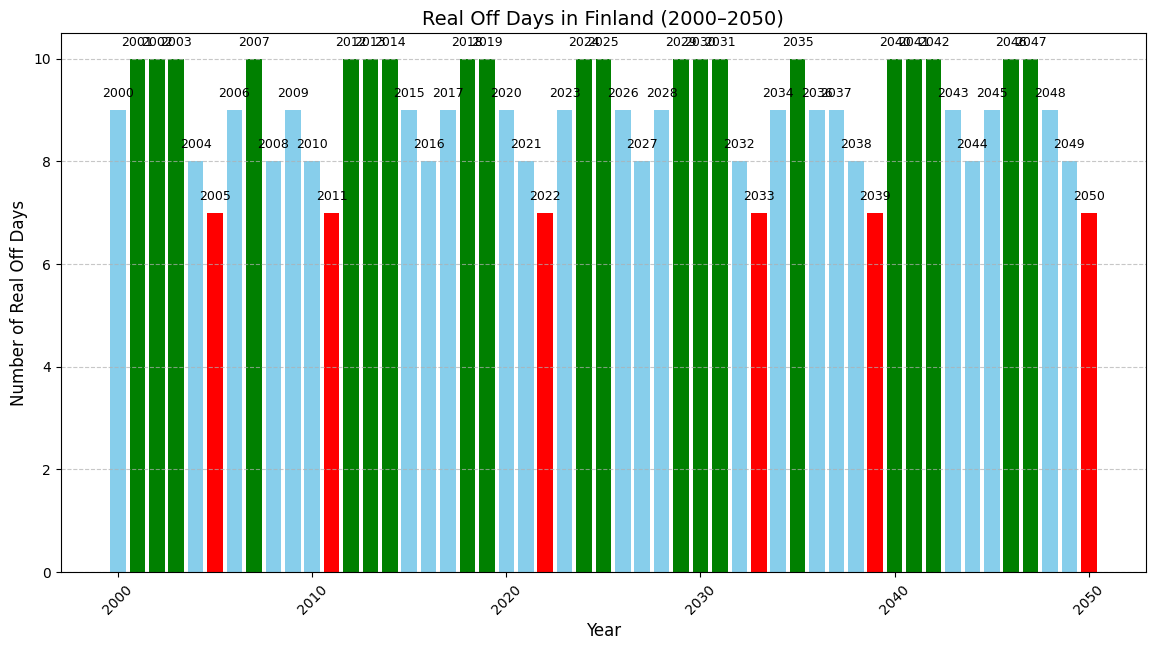

In [153]:
# Identify all best and worst years
max_real_off_days = real_off_days_df['Real Off Days'].max()
min_real_off_days = real_off_days_df['Real Off Days'].min()

best_years = real_off_days_df[real_off_days_df['Real Off Days'] == max_real_off_days]
worst_years = real_off_days_df[real_off_days_df['Real Off Days'] == min_real_off_days]

# Plot the trend of real off days as a bar chart
plt.figure(figsize=(14, 7))
bars = plt.bar(real_off_days_df['Year'], real_off_days_df['Real Off Days'], color='skyblue', label='Real Off Days')

# Highlight all best years
for _, row in best_years.iterrows():
    plt.bar(row['Year'], row['Real Off Days'], color='green', label=f"Best Year ({row['Year']})" if _ == 0 else None)

# Highlight all worst years
for _, row in worst_years.iterrows():
    plt.bar(row['Year'], row['Real Off Days'], color='red', label=f"Worst Year ({row['Year']})" if _ == 0 else None)

# Add the number of real off days as labels above the bars
for bar in bars:
    height = bar.get_height()
    year = int(bar.get_x() + bar.get_width() / 2)  # Use the x-coordinate of the bar for year
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        height + 0.2,  # Slightly above the bar
        f"{year}",  # The label includes both the year and real off days
        ha='center', va='bottom', fontsize=9
    )

# Add labels and title
plt.title('Real Off Days in Finland (2000–2050)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Real Off Days', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

The worst and the best decad

In [ ]:
# Aggregate real off days by decade
decade_real_off_days = {
    decade: sum(real_off_days[year] for year in range(decade, decade + 10))
    for decade in range(start_year, end_year + 1, 10)
}

# Convert the aggregated data into a DataFrame for easier visualization
decade_real_off_days_df = pd.DataFrame.from_dict(
    decade_real_off_days, orient='index', columns=['Real Off Days']
)
decade_real_off_days_df.index.name = 'Decade'
decade_real_off_days_df.reset_index(inplace=True)

# Identify the best and worst decades
best_decade = decade_real_off_days_df.loc[decade_real_off_days_df['Real Off Days'].idxmax()]
worst_decade = decade_real_off_days_df.loc[decade_real_off_days_df['Real Off Days'].idxmin()]

# Plot the trend of real off days by decade as a bar chart
plt.figure(figsize=(14, 7))
bars = plt.bar(decade_real_off_days_df['Decade'], decade_real_off_days_df['Real Off Days'], color='skyblue', label='Real Off Days')

# Highlight the best decade
plt.bar(best_decade['Decade'], best_decade['Real Off Days'], color='green', label=f"Best Decade ({best_decade['Decade']})")

# Highlight the worst decade
plt.bar(worst_decade['Decade'], worst_decade['Real Off Days'], color='red', label=f"Worst Decade ({worst_decade['Decade']})")

# Add the number of real off days as labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        height + 0.2,  # Slightly above the bar
        f"{int(height)}",  # The label includes the real off days
        ha='center', va='bottom', fontsize=9
    )

# Add labels and title
plt.title('Real Off Days in Finland by Decade (2000–2050)', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Real Off Days', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()

# Print the best and worst decades
print(f"Best Decade: {best_decade['Decade']} with {best_decade['Real Off Days']} real off days")
print(f"Worst Decade: {worst_decade['Decade']} with {worst_decade['Real Off Days']} real off days")

# Testr

In [154]:
# Function to calculate detailed statistics for each year
def calculate_yearly_statistics(year, holidays_dict, weekends_dict):
    holidays_on_weekends = 0
    for holiday_date in holidays_dict[year].keys():
        if holiday_date in weekends_dict[year]:
            holidays_on_weekends += 1
    
    total_holidays = len(holidays_dict[year])
    real_off_days = total_holidays - holidays_on_weekends
    total_weekends = len(weekends_dict[year])
    total_days_off = total_weekends + real_off_days
    
    return {
        'Year': year,
        'Total Public Holidays': total_holidays,
        'Holidays on Weekends': holidays_on_weekends,
        'Real Off Days': real_off_days,
        'Total Weekends': total_weekends,
        'Total Days Off': total_days_off
    }

# Calculate statistics for all years
yearly_statistics = [
    calculate_yearly_statistics(year, fi_holidays, weekends)
    for year in range(start_year, end_year + 1)
]

# Convert the statistics to a DataFrame
stats_df = pd.DataFrame(yearly_statistics)

stats_df.head()


,Year,Total Public Holidays,Holidays on Weekends,Real Off Days,Total Weekends,Total Days Off
0,2000,15,6,9,106,115
1,2001,15,5,10,104,114
2,2002,15,5,10,104,114
3,2003,15,5,10,104,114
4,2004,15,7,8,104,112


a diagram showing the distribution of days off throughout each year and identify periods with more or fewer days off, we can aggregate the "off days" (weekends + public holidays) by month for every 10-year period. 

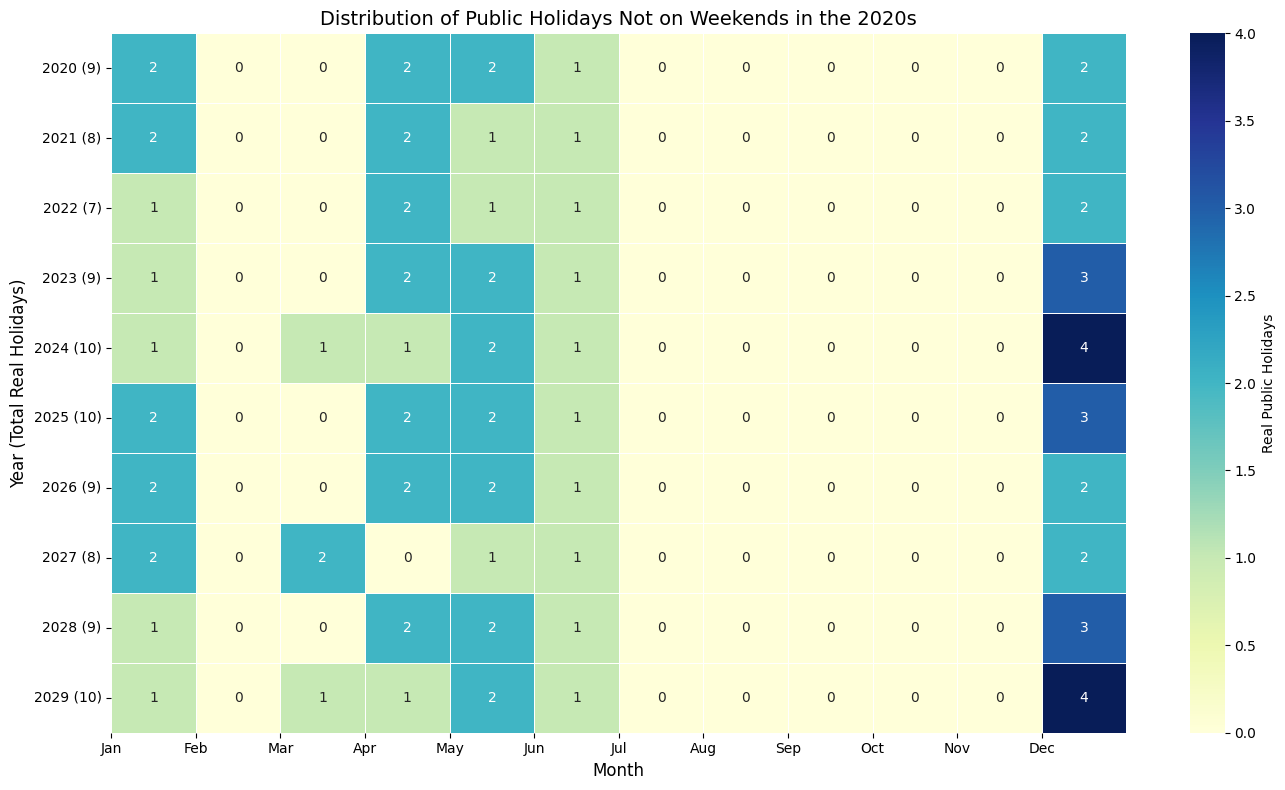

In [155]:
import seaborn as sns

# Prepare data for the 2020s
years_2020s = range(2020, 2030)

# Aggregate real public holidays for each month in the 2020s
monthly_real_holidays_2020s = pd.DataFrame({
    year: {month: sum(1 for date in fi_holidays[year] if date.month == month and date not in weekends[year]) for month in range(1, 13)}
    for year in years_2020s
}).fillna(0)

# Rearrange the DataFrame to have months as columns and years as rows
monthly_real_holidays_2020s = monthly_real_holidays_2020s.T
monthly_real_holidays_2020s.columns = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

# Add a column for the total number of real holidays in each year
monthly_real_holidays_2020s['Total'] = monthly_real_holidays_2020s.sum(axis=1)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    monthly_real_holidays_2020s.iloc[:, :-1],  # Exclude the 'Total' column from heatmap
    annot=True,  # Show actual values in the heatmap
    fmt=".0f",  # Format as integers
    cmap="YlGnBu", 
    cbar_kws={'label': 'Real Public Holidays'}, 
    yticklabels=[f"{year} ({int(total)})" for year, total in zip(years_2020s, monthly_real_holidays_2020s['Total'])],  # Add total to y-axis labels
    linewidths=0.5
)

# Add labels and title
plt.title('Distribution of Public Holidays Not on Weekends in the 2020s', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year (Total Real Holidays)', fontsize=12)
plt.xticks(ticks=range(12), labels=monthly_real_holidays_2020s.columns[:-1])
plt.tight_layout()

# Show the plot
plt.show()
